In [7]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.3 MB/s eta 0:00:00


In [8]:
import gymnasium as gym
import numpy as np
import random
import time

In [9]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [10]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [12]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [13]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [14]:
q_table

array([[0.55497444, 0.48438044, 0.46268285, 0.47189868],
       [0.30004861, 0.25880026, 0.21487813, 0.43004795],
       [0.35626771, 0.29107689, 0.28623601, 0.29795009],
       [0.00718249, 0.        , 0.        , 0.33523023],
       [0.57153643, 0.3469319 , 0.32152875, 0.44372534],
       [0.        , 0.        , 0.        , 0.        ],
       [0.14297252, 0.10245059, 0.36758496, 0.07980807],
       [0.        , 0.        , 0.        , 0.        ],
       [0.39404509, 0.39172504, 0.37552395, 0.6084978 ],
       [0.4985779 , 0.69290234, 0.47754997, 0.41079708],
       [0.71190831, 0.37479331, 0.36039716, 0.27159568],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.50753397, 0.54733986, 0.75537714, 0.41568078],
       [0.73386465, 0.88908836, 0.76008517, 0.72975501],
       [0.        , 0.        , 0.        , 0.        ]])

In [15]:
sum(rewards_all)

12503.0

In [16]:
sum(rewards_all[0:1000])

81.0

In [17]:
sum(rewards_all[1000:2000])

408.0

In [18]:
sum(rewards_all[2000:3000])

542.0

In [19]:
sum(rewards_all[9000:10000])

693.0

In [20]:
sum(rewards_all[19000:20000])

658.0

In [21]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [22]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [23]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [24]:
play_multiple_times(env, q_table, 1000)

Number of successes: 721/1000
Average number of steps: 36.78224687933426


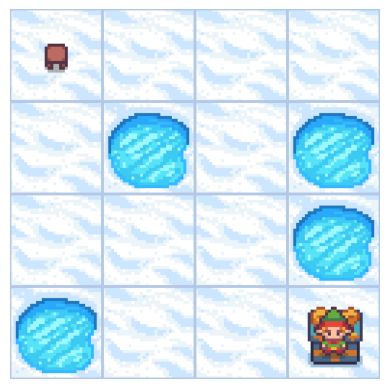

(1.0, 87)

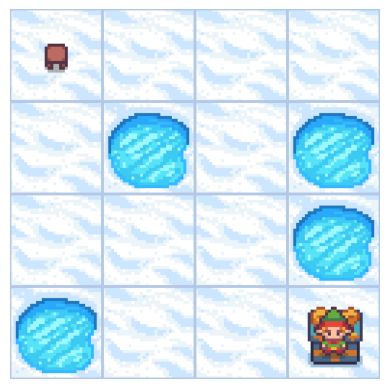

In [25]:
play(env, q_table, render=True)

In [26]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [27]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

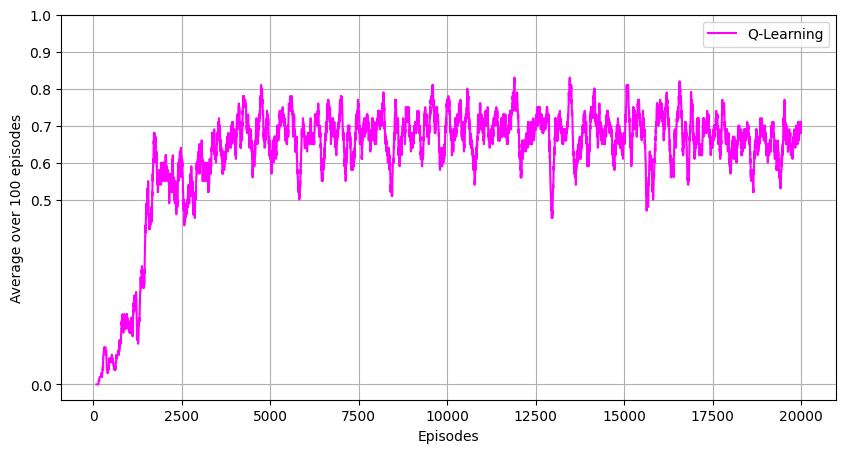

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [29]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    sarsa_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

        exploration = random.uniform(0, 1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(sarsa_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0, 1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(sarsa_table[next_state, :])

            sarsa_table[state, action] = sarsa_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * sarsa_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                done = True

            if done:
                break

        rewards_all.append(reward_episode)

    print(f'Episode {episode} finished')
    return sarsa_table, rewards_all

In [30]:
def countAverage(rewards, window):
    moving_averages = []
    for ind in range(len(rewards) - window + 1):
        moving_averages.append(np.mean(rewards[ind:ind+window]))

    for ind in range(window - 1):
        moving_averages.insert(0, np.nan)

    return moving_averages

## **FrozenLake-v1**
**Lưu ý:** Việc dùng chung 1 bộ tham số sẽ giúp đánh giá 2 thuật toán một cách tốt hơn


In [55]:
# Hyperparameters - FrozenLake-v1
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [56]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
sarsa_table, rewards_allSarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished
Episode 19999 finished


In [57]:
sarsa_table

array([[0.5014038 , 0.46978801, 0.46997243, 0.46981997],
       [0.26396747, 0.15886538, 0.24907796, 0.45204174],
       [0.34534706, 0.34387233, 0.31353136, 0.42320848],
       [0.2691924 , 0.16619395, 0.1903812 , 0.40964586],
       [0.52354483, 0.3877407 , 0.34344581, 0.26584944],
       [0.        , 0.        , 0.        , 0.        ],
       [0.41740418, 0.12683664, 0.17684411, 0.10730527],
       [0.        , 0.        , 0.        , 0.        ],
       [0.33193391, 0.33293709, 0.39761598, 0.57830139],
       [0.46111238, 0.64946105, 0.45388861, 0.43882989],
       [0.6177207 , 0.42984352, 0.37073169, 0.21844835],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.44725947, 0.45620599, 0.71866173, 0.36564143],
       [0.6554    , 0.86981065, 0.7587745 , 0.74879074],
       [0.        , 0.        , 0.        , 0.        ]])

In [58]:
sum(rewards_allSarsa)

12401.0

In [59]:
print("Q-Learning")
play_multiple_times(env, q_table, 1000)
print('\n')
print("SARSA")
play_multiple_times(env, sarsa_table, 1000)

Q-Learning
Number of successes: 724/1000
Average number of steps: 39.226519337016576


SARSA
Number of successes: 767/1000
Average number of steps: 38.74445893089961


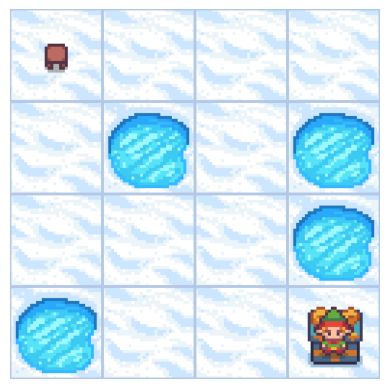

(1.0, 27)

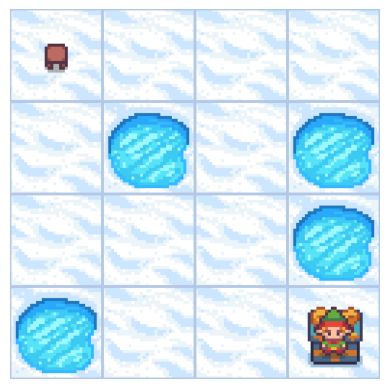

In [60]:
play(env, sarsa_table, render=True)

In [61]:
average_ySarsa = countAverage(rewards_allSarsa, 100)
average_y = countAverage(rewards_all, 100)

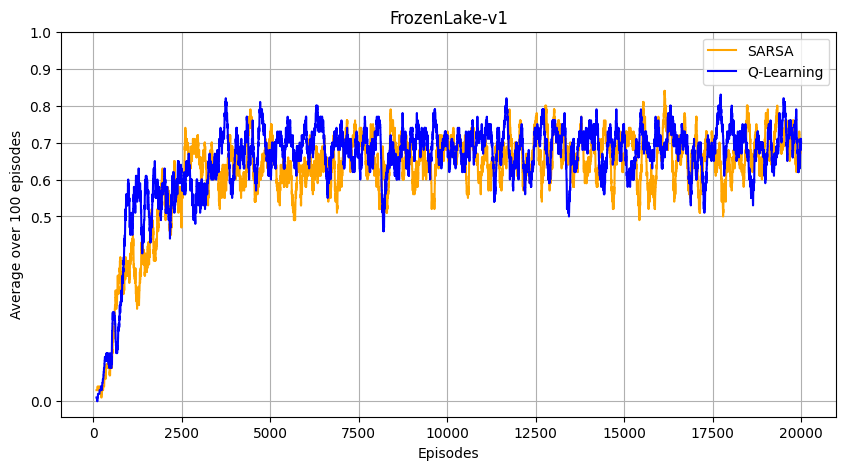

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_allSarsa)), average_ySarsa, color='orange', label='SARSA')
plt.plot(np.arange(len(rewards_all)), average_y, color='blue', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake-v1')
plt.legend()
plt.show()

# **Nhận xét**
Trong môi trường FrozenLake-v1, Q-Learning có xu hướng đạt được kết quả trung bình cao hơn so với SARSA, mặc dù dao động mạnh hơn. Cả hai thuật toán đều cho thấy sự học hỏi và cải thiện qua các tập. Trong khi Q-Learning thường có hiệu suất tốt hơn trong hầu hết các giai đoạn thì SARSA ổn định hơn nhưng không đạt được giá trị trung bình cao như Q-Learning.

## **FrozenLake8x8-v1**
**Lưu ý:** Việc dùng chung 1 bộ tham số sẽ giúp đánh giá 2 thuật toán một cách tốt hơn


In [39]:
# Hyperparameters - FrozenLake8x8-v1
gamma = 0.99
learning_rate = 0.075
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.0001

num_episodes = 50000
num_steps_per_episode = 300

In [40]:
print(num_steps_per_episode)
envFL88 = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")
q_tableFL88, rewards_allFL88 = q_learning(envFL88, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
sarsa_tableFL88, rewards_allSarsaFL88 = sarsa(envFL88, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

300
Episode 49999 finished
Episode 49999 finished


In [41]:
sarsa_tableFL88

array([[3.66076726e-01, 3.66246535e-01, 3.66092286e-01, 3.73363866e-01],
       [3.74984978e-01, 3.77554801e-01, 3.88362442e-01, 3.77403470e-01],
       [3.94256772e-01, 3.95473685e-01, 4.17612965e-01, 3.93612711e-01],
       [4.10364004e-01, 4.10973650e-01, 4.13541604e-01, 4.45454920e-01],
       [4.31844395e-01, 4.37694426e-01, 4.80718397e-01, 4.39154766e-01],
       [4.63910406e-01, 4.65495143e-01, 5.04438507e-01, 4.64503230e-01],
       [4.86922890e-01, 4.87288204e-01, 5.39880915e-01, 4.86928488e-01],
       [4.94076761e-01, 4.91734491e-01, 5.52134716e-01, 4.95124677e-01],
       [3.58607021e-01, 3.64543913e-01, 3.61160383e-01, 3.68246246e-01],
       [3.68876959e-01, 3.51556076e-01, 3.72283689e-01, 3.81408082e-01],
       [3.82361056e-01, 3.81326222e-01, 3.86739357e-01, 3.97430984e-01],
       [1.86880959e-01, 2.99810240e-01, 3.61908730e-01, 4.29962686e-01],
       [4.08673284e-01, 4.21914283e-01, 4.10270840e-01, 4.68759194e-01],
       [4.41810558e-01, 4.47064204e-01, 4.89297744e

In [42]:
sum(rewards_allSarsaFL88)

24171.0

In [43]:
print("Q-Learning")
play_multiple_times(envFL88, q_tableFL88, 1000)
print('\n')
print("SARSA")
play_multiple_times(envFL88, sarsa_tableFL88, 1000)

Q-Learning
Number of successes: 853/1000
Average number of steps: 82.00351699882766


SARSA
Number of successes: 837/1000
Average number of steps: 83.14695340501792


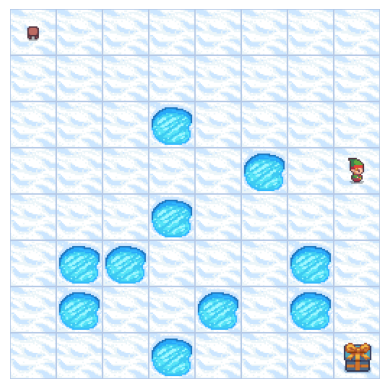

(0.0, 200)

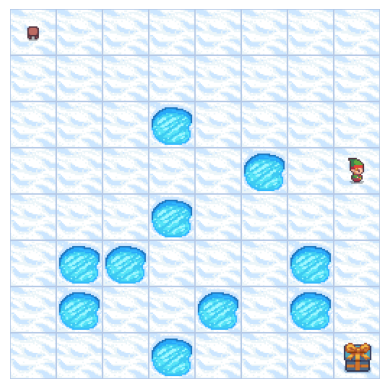

In [44]:
play(envFL88, sarsa_tableFL88, render=True)

In [45]:
average_ySarsaFL88 = countAverage(rewards_allSarsaFL88, 100)
average_yFL88 = countAverage(rewards_allFL88, 100)

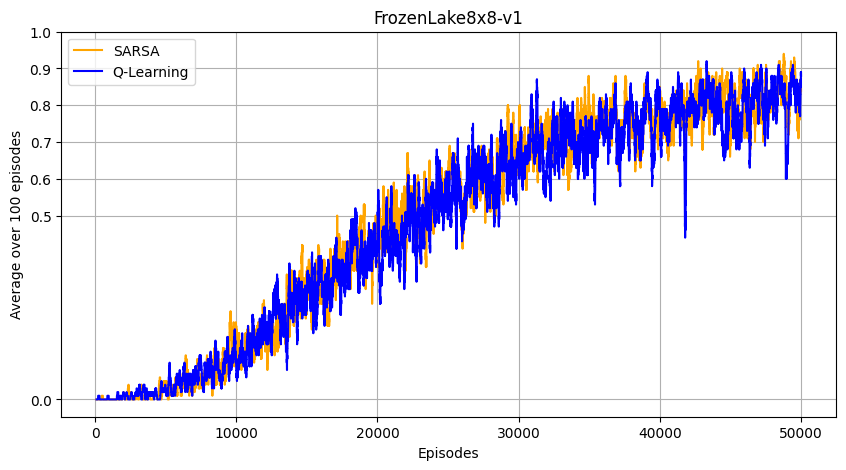

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_allSarsaFL88)), average_ySarsaFL88, color='orange', label='SARSA')
plt.plot(np.arange(len(rewards_allFL88)), average_yFL88, color='blue', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake8x8-v1')
plt.legend()
plt.show()

# **Nhận xét**
Trong môi trường FrozenLake8x8-v1, SARSA cho thấy sự ổn định vượt trội so với Q-Learning, đặc biệt trong giai đoạn đầu và giữa quá trình học. Tuy nhiên, khi số lượng tập đạt khoảng 40000, cả hai thuật toán đều đạt được hiệu suất tương đương nhau. Điểm khác biệt chính giữa hai thuật toán nằm ở mức độ biến động và tốc độ hội tụ, với SARSA ổn định hơn và Q-Learning có khả năng khám phá nhiều hơn nhưng đi kèm với mức biến động cao hơn.

## **Taxi-v3**
**Lưu ý:** Việc dùng chung 1 bộ tham số sẽ giúp đánh giá 2 thuật toán một cách tốt hơn


In [47]:
# Hyperparameters - Taxi-v3
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [48]:
print(num_steps_per_episode)
envTaxi = gym.make('Taxi-v3', render_mode="rgb_array")
q_tableTaxi, rewards_allTaxi = q_learning(envTaxi, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
sarsa_tableTaxi, rewards_allSarsaTaxi = sarsa(envTaxi, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

100
Episode 19999 finished
Episode 19999 finished


In [49]:
sarsa_tableTaxi

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.50750449,  0.01653344, -2.43080374, -2.82938257,  8.99569797,
        -3.89671312],
       [ 1.53087198, -2.33708667,  1.98939355, -0.0172052 , 13.59981845,
        -0.11426755],
       ...,
       [-1.84779584, -0.25914463, -1.83187328, -1.78864012, -4.51048361,
        -3.59602945],
       [-3.4138558 , -1.64983068, -3.41593258, -3.29288906, -4.35734969,
        -6.27454754],
       [-0.4600801 ,  9.72420193, -0.47959665, -0.30576781, -1.        ,
        -2.72881   ]])

In [50]:
sum(rewards_allSarsaTaxi)

3699.0

In [51]:
print("Q-Learning")
play_multiple_times(envTaxi, q_tableTaxi, 1000)
print('\n')
print("SARSA")
play_multiple_times(envTaxi, sarsa_tableTaxi, 1000)

Q-Learning
Number of successes: 1000/1000
Average number of steps: 13.003


SARSA
Number of successes: 1000/1000
Average number of steps: 13.235


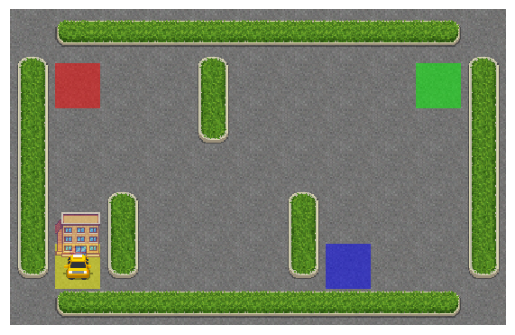

(7, 14)

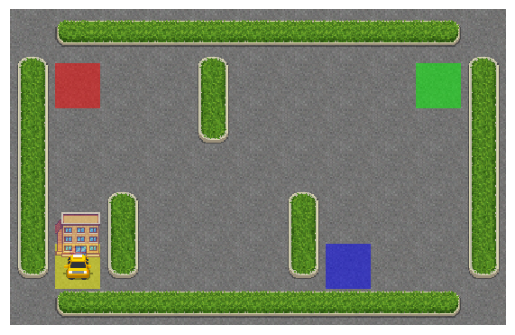

In [52]:
play(envTaxi, sarsa_tableTaxi, render=True)

In [53]:
average_ySarsaTaxi = countAverage(rewards_allSarsaTaxi, 100)
average_yTaxi = countAverage(rewards_allTaxi, 100)

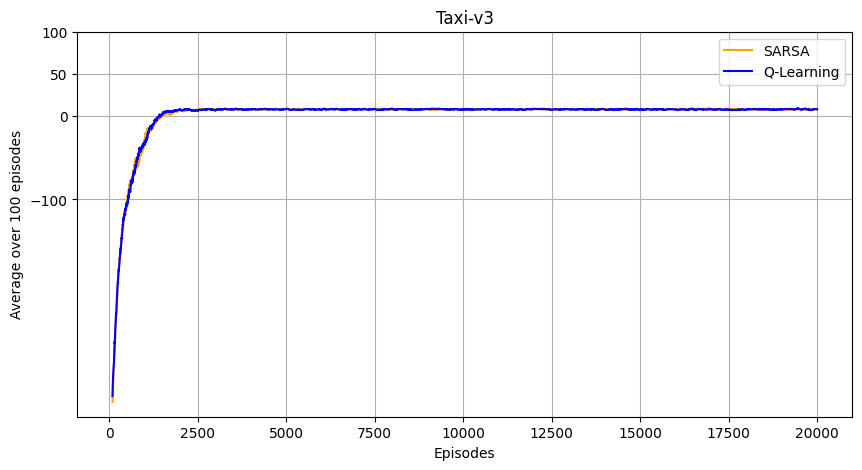

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_allSarsaTaxi)), average_ySarsaTaxi, color='orange', label='SARSA')
plt.plot(np.arange(len(rewards_allTaxi)), average_yTaxi, color='blue', label='Q-Learning')
plt.yticks([-100, 0, 50, 100])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('Taxi-v3')
plt.legend()
plt.show()

# **Nhận xét**
Trong môi trường Taxi-v3, cả Q-Learning và SARSA đều hoạt động tốt và đạt hiệu suất tương đương nhau trong môi trường Taxi-v3. Cả hai thuật toán đều hội tụ nhanh chóng và đạt được hiệu suất ổn định sau một số tập nhất định. Điều này phản ánh tính chất của môi trường Taxi-v3, nơi cả hai thuật toán đều có thể dễ dàng tìm ra chiến lược hiệu quả.